## The Duffing resonator

This notebook replicates the example detailed in https://nonlinearoscillations.github.io/HarmonicBalance.jl/stable/examples/single_Duffing/

In [8]:
using HarmonicBalance
@variables α, ω, ω0, F, t, γ, x(t); # declare constant variables and a function x(t)

In [9]:
# define ODE 
diff_eq = DifferentialEquation(d(x,t,2) + ω0^2*x + α*x^3 + γ*d(x,t) ~ F*cos(ω*t), x)

# specify the ansatz x = u(T) cos(ωt) + v(T) sin(ωt)
add_harmonic!(diff_eq, x, ω) 

System of 1 differential equations
Variables:       x(t)
Harmonic ansatz: x(t) => ω;   

α*(x(t)^3) + (ω0^2)*x(t) + γ*Differential(t)(x(t)) + Differential(t)(Differential(t)(x(t))) ~ F*cos(t*ω)


In [10]:
# implement ansatz to get harmonic equations
harmonic_eq = get_harmonic_equations(diff_eq)

A set of 2 harmonic equations
Variables: u1(T), v1(T)
Parameters: α, ω, γ, ω0, F

Harmonic ansatz: 
x(t) = u1(T)*cos(ωt) + v1(T)*sin(ωt)

Harmonic equations:

γ*Differential(T)(u1(T)) + (ω0^2)*u1(T) + (3//4)*α*(u1(T)^3) + γ*ω*v1(T) + (2//1)*ω*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^2)*u1(T) - (ω^2)*u1(T) ~ F

(ω0^2)*v1(T) + γ*Differential(T)(v1(T)) + (3//4)*α*(v1(T)^3) + (3//4)*α*(u1(T)^2)*v1(T) - (ω^2)*v1(T) - (2//1)*ω*Differential(T)(u1(T)) - γ*ω*u1(T) ~ 0


### Single-harmonic ansatz, drive near resonance

In [11]:
fixed = (α => 1., ω0 => 1.0, F => 0.01, γ=>0.01) # fixed parameters
varied = ω => LinRange(0.9, 1.2, 100)              # range of parameter values
result = get_steady_states(harmonic_eq, varied, fixed)

A steady state result for 100 parameter points

Solution branches:   3
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


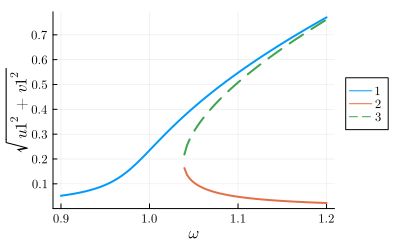

In [12]:
plot(result, "sqrt(u1^2 + v1^2)", size=(400,250))

In [14]:
savefig("figs/simple_Duffing/response_single.png")

### two-harmonic ansatz

    ω:       drive frequency
    3ω:      upconverted via the nonlinearity

In [15]:
add_harmonic!(diff_eq, x, [ω, 3ω]) # specify the two-harmonics ansatz
harmonic_eq = get_harmonic_equations(diff_eq)
result = get_steady_states(harmonic_eq, varied, fixed)

Tracking 81 paths...   2%|▊                             |  ETA: 0:00:59
  # paths tracked:                  2
  # non-singular solutions (real):  0 (0)
  # singular endpoints (real):      0 (0)






Tracking 81 paths... 100%|██████████████████████████████| Time: 0:00:01
  # paths tracked:                  81
  # non-singular solutions (real):  3 (0)
  # singular endpoints (real):      0 (0)
  # total solutions (real):         3 (0)


A steady state result for 100 parameter points

Solution branches:   3
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


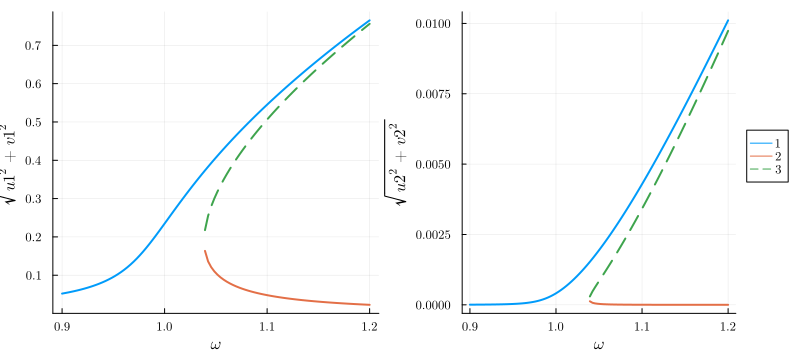

In [16]:
p1=plot(result, "sqrt(u1^2 + v1^2)", legend=false)
p2=plot(result, "sqrt(u2^2 + v2^2)")
plot(p1, p2, size=(800,350))

In [17]:
savefig("figs/simple_Duffing/response_two_weak.png")

### two-harmonic ansatz: strong interactions

In [18]:
fixed = (α => 10., ω0 => 3, F => 5, γ=>0.01)   
varied = ω => LinRange(0.9, 1.4, 100) 
result = get_steady_states(harmonic_eq, varied, fixed)

A steady state result for 100 parameter points

Solution branches:   9
   of which real:    3
   of which stable:  2

Classes: stable, physical, Hopf, binary_labels


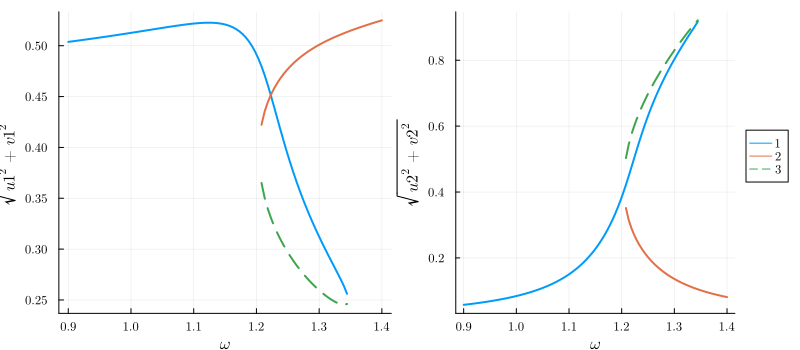

In [19]:
p1=plot(result, "sqrt(u1^2 + v1^2)", legend=false)
p2=plot(result, "sqrt(u2^2 + v2^2)")
plot(p1, p2, size=(800,350))

In [20]:
savefig("figs/simple_Duffing/response_two_strong.png")